In [124]:
# import libraries
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from ucimlrepo import fetch_ucirepo
import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

# Import Iris Data
---
This is a multiclassification

In [125]:
# fetch dataset
iris = fetch_ucirepo(id=53)

# data (as pandas dataframes)
X = iris.data.features
y = iris.data.targets

In [126]:
X.head(10)

,sepal length,sepal width,petal length,petal width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


In [127]:
# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the data
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

#X.head(10)

In [128]:
data

tensor([[0.2222, 0.6250, 0.0678, 0.0417],
        [0.1667, 0.4167, 0.0678, 0.0417],
        [0.1111, 0.5000, 0.0508, 0.0417],
        [0.0833, 0.4583, 0.0847, 0.0417],
        [0.1944, 0.6667, 0.0678, 0.0417],
        [0.3056, 0.7917, 0.1186, 0.1250],
        [0.0833, 0.5833, 0.0678, 0.0833],
        [0.1944, 0.5833, 0.0847, 0.0417],
        [0.0278, 0.3750, 0.0678, 0.0417],
        [0.1667, 0.4583, 0.0847, 0.0000],
        [0.3056, 0.7083, 0.0847, 0.0417],
        [0.1389, 0.5833, 0.1017, 0.0417],
        [0.1389, 0.4167, 0.0678, 0.0000],
        [0.0000, 0.4167, 0.0169, 0.0000],
        [0.4167, 0.8333, 0.0339, 0.0417],
        [0.3889, 1.0000, 0.0847, 0.1250],
        [0.3056, 0.7917, 0.0508, 0.1250],
        [0.2222, 0.6250, 0.0678, 0.0833],
        [0.3889, 0.7500, 0.1186, 0.0833],
        [0.2222, 0.7500, 0.0847, 0.0833],
        [0.3056, 0.5833, 0.1186, 0.0417],
        [0.2222, 0.7083, 0.0847, 0.1250],
        [0.0833, 0.6667, 0.0000, 0.0417],
        [0.2222, 0.5417, 0.1186, 0

In [129]:
y = y.copy()
y['class'] = y['class'].replace({
    'Iris-setosa': 0,
    'Iris-versicolor': 1,
    'Iris-virginica': 2
})

/tmp/ipython-input-1168616893.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y['class'] = y['class'].replace({


# Exploratory Data Analysis
----

In [130]:
eda = X.copy()
eda["species"] = y
eda.head()

,sepal length,sepal width,petal length,petal width,species
0,0.222222,0.625000,0.067797,0.041667,0
1,0.166667,0.416667,0.067797,0.041667,0
2,0.111111,0.500000,0.050847,0.041667,0
3,0.083333,0.458333,0.084746,0.041667,0
4,0.194444,0.666667,0.067797,0.041667,0


In [131]:
corr = eda.corr()
corr.style.background_gradient(cmap='coolwarm')

,sepal length,sepal width,petal length,petal width,species
sepal length,1.000000,-0.109369,0.871754,0.817954,0.782561
sepal width,-0.109369,1.000000,-0.420516,-0.356544,-0.419446
petal length,0.871754,-0.420516,1.000000,0.962757,0.949043
petal width,0.817954,-0.356544,0.962757,1.000000,0.956464
species,0.782561,-0.419446,0.949043,0.956464,1.000000


In [132]:
# convert to a pytorch tensor
data = torch.tensor(X.values).float()
data

tensor([[0.2222, 0.6250, 0.0678, 0.0417],
        [0.1667, 0.4167, 0.0678, 0.0417],
        [0.1111, 0.5000, 0.0508, 0.0417],
        [0.0833, 0.4583, 0.0847, 0.0417],
        [0.1944, 0.6667, 0.0678, 0.0417],
        [0.3056, 0.7917, 0.1186, 0.1250],
        [0.0833, 0.5833, 0.0678, 0.0833],
        [0.1944, 0.5833, 0.0847, 0.0417],
        [0.0278, 0.3750, 0.0678, 0.0417],
        [0.1667, 0.4583, 0.0847, 0.0000],
        [0.3056, 0.7083, 0.0847, 0.0417],
        [0.1389, 0.5833, 0.1017, 0.0417],
        [0.1389, 0.4167, 0.0678, 0.0000],
        [0.0000, 0.4167, 0.0169, 0.0000],
        [0.4167, 0.8333, 0.0339, 0.0417],
        [0.3889, 1.0000, 0.0847, 0.1250],
        [0.3056, 0.7917, 0.0508, 0.1250],
        [0.2222, 0.6250, 0.0678, 0.0833],
        [0.3889, 0.7500, 0.1186, 0.0833],
        [0.2222, 0.7500, 0.0847, 0.0833],
        [0.3056, 0.5833, 0.1186, 0.0417],
        [0.2222, 0.7083, 0.0847, 0.1250],
        [0.0833, 0.6667, 0.0000, 0.0417],
        [0.2222, 0.5417, 0.1186, 0

In [133]:
# --- Convert to PyTorch tensors ---
labels = torch.tensor(y['class'].values, dtype=torch.long)
labels

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2])

# Functions to create and train the model

In [134]:
# Note the input into the function!
def createModel(nHidden):

    # model architecture (with number of units soft-coded!)
    ANN = nn.Sequential(
      nn.Linear(4,nHidden),      # input layer
      nn.ReLU(),                 # activation unit
      nn.Linear(nHidden,nHidden),# 1st hidden layer
      nn.ReLU(),                 # activation unit
      nn.Linear(nHidden,3),      # output unit
        )

    # loss function
    lossfunc = nn.CrossEntropyLoss()

    # optimizer
    optim = torch.optim.SGD(ANN.parameters(),lr=.01)

    return ANN,lossfunc,optim

In [135]:
# a function to train the model

def train(ANN):

    # initialize losses
    losses = torch.zeros(epochs)
    acc = []

    # loop over epochs
    for i in range(epochs):

        # forward pass
        pred = ANN(data)

        # compute loss
        loss = lossfunc(pred,labels)
        losses[i] = loss

        # backprop
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    # final forward pass
    predictions = ANN(data)

    predlabels = torch.argmax(predictions,axis=1)
    return 100*torch.mean((predlabels==labels).float())

# Perform the experiment

In [136]:
epochs  = 150
numhiddens = np.arange(1,129)
accuracies = []

for units in numhiddens:

    # create a fresh model instance
    ANN,lossfunc,optimizer = createModel(units)

    # run the model
    acc = train(ANN)
    accuracies.append(acc)

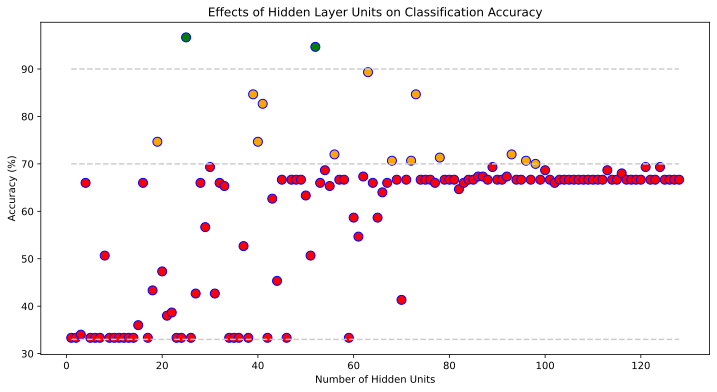

In [137]:
fig, ax = plt.subplots(figsize=(12, 6))

for i in range(len(accuracies)):
    if accuracies[i] < 70:
        color = 'red'
    elif 70 <= accuracies[i] <= 90:
        color = 'orange'
    else:
        color = 'green'
    ax.plot(numhiddens[i], accuracies[i], 'o-', color='blue', markerfacecolor=color, markersize=9)

# reference lines
ax.plot([numhiddens[0], numhiddens[-1]], [33, 33], '--', color=[.8, .8, .8])
ax.plot([numhiddens[0], numhiddens[-1]], [70, 70], '--', color=[.8, .8, .8])
ax.plot([numhiddens[0], numhiddens[-1]], [90, 90], '--', color=[.8, .8, .8])

# labels
ax.set_ylabel('Accuracy (%)')
ax.set_xlabel('Number of Hidden Units')
ax.set_title('Effects of Hidden Layer Units on Classification Accuracy')
plt.show()

# Experiments

1. Try changing the data type of the label from integer to float, and compare the result with the original.
2. Perform an experiment that will relate the varying values of learning rate and number of hidden units, and epoch. Create a bubble chart with the x-axis as the number of units, the y-axis as the learning rate, the size as the number of epochs, and the color as the accuracy.

/tmp/ipython-input-994765561.py:19: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y['class'] = y['class'].replace({


EXPERIMENT 1: LABEL TYPE COMPARISON
Float label training error: expected scalar type Long but found Float
Accuracy with integer labels: 66.00%
Accuracy with float labels: Not supported

EXPERIMENT 2: LEARNING RATE × HIDDEN UNITS × EPOCHS
Hidden=4   | LR=0.001 | Epochs=50  → Accuracy=32.67%
Hidden=4   | LR=0.001 | Epochs=100 → Accuracy=33.33%
Hidden=4   | LR=0.001 | Epochs=150 → Accuracy=33.33%
Hidden=8   | LR=0.001 | Epochs=50  → Accuracy=33.33%
Hidden=8   | LR=0.001 | Epochs=100 → Accuracy=33.33%
Hidden=8   | LR=0.001 | Epochs=150 → Accuracy=33.33%
Hidden=16  | LR=0.001 | Epochs=50  → Accuracy=33.33%
Hidden=16  | LR=0.001 | Epochs=100 → Accuracy=32.67%
Hidden=16  | LR=0.001 | Epochs=150 → Accuracy=33.33%
Hidden=32  | LR=0.001 | Epochs=50  → Accuracy=33.33%
Hidden=32  | LR=0.001 | Epochs=100 → Accuracy=48.00%
Hidden=32  | LR=0.001 | Epochs=150 → Accuracy=62.67%
Hidden=64  | LR=0.001 | Epochs=50  → Accuracy=0.00%
Hidden=64  | LR=0.001 | Epochs=100 → Accuracy=33.33%
Hidden=64  | LR=0.001

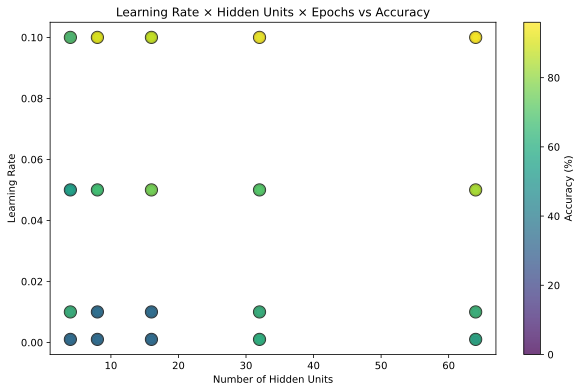

In [146]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from ucimlrepo import fetch_ucirepo


# LOAD AND PREPARE DATA
iris = fetch_ucirepo(id=53)
X = iris.data.features
y = iris.data.targets

scaler = MinMaxScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

y = y.copy()
y['class'] = y['class'].replace({
    'Iris-setosa': 0,
    'Iris-versicolor': 1,
    'Iris-virginica': 2
})

data = torch.tensor(X.values).float()
labels_int = torch.tensor(y['class'].values).long()
labels_float = torch.tensor(y['class'].values).float()


# CREATE MODEL
def createModel(nHidden, learningRate=0.01):
    ANN = nn.Sequential(
        nn.Linear(4, nHidden),
        nn.ReLU(),
        nn.Linear(nHidden, nHidden),
        nn.ReLU(),
        nn.Linear(nHidden, 3)
    )
    lossfunc = nn.CrossEntropyLoss()
    optimizer = torch.optim.SGD(ANN.parameters(), lr=learningRate)
    return ANN, lossfunc, optimizer


# TRAINING FUNCTION
def train(ANN, lossfunc, optimizer, data, labels, epochs=150):
    for epoch in range(epochs):
        pred = ANN(data)
        loss = lossfunc(pred, labels)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    with torch.no_grad():
        pred = ANN(data)
        predlabels = torch.argmax(pred, axis=1)
        acc = 100 * torch.mean((predlabels == labels).float())
    return acc.item()


# EXPERIMENT 1:
print("EXPERIMENT 1: LABEL TYPE COMPARISON")
epochs = 150
nHidden = 32

# Integer labels
ANN1, lossfunc1, optimizer1 = createModel(nHidden, 0.01)
acc_int = train(ANN1, lossfunc1, optimizer1, data, labels_int, epochs)

# Float labels (will cause incorrect training)
ANN2, lossfunc2, optimizer2 = createModel(nHidden, 0.01)
try:
    acc_float = train(ANN2, lossfunc2, optimizer2, data, labels_float, epochs)
except Exception as e:
    acc_float = None
    print("Float label training error:", e)

print(f"Accuracy with integer labels: {acc_int:.2f}%")
if acc_float:
    print(f"Accuracy with float labels: {acc_float:.2f}%")
else:
    print("Accuracy with float labels: Not supported")


# EXPERIMENT 2:
print("\nEXPERIMENT 2: LEARNING RATE × HIDDEN UNITS × EPOCHS")

learning_rates = [0.001, 0.01, 0.05, 0.1]
hidden_units = [4, 8, 16, 32, 64]
epoch_list = [50, 100, 150]
results = []

for lr in learning_rates:
    for h in hidden_units:
        for e in epoch_list:
            ANN, lossfunc, optimizer = createModel(h, lr)
            acc = train(ANN, lossfunc, optimizer, data, labels_int, e)  # use integer labels here
            results.append((h, lr, e, acc))
            print(f"Hidden={h:<3} | LR={lr:<5} | Epochs={e:<3} → Accuracy={acc:.2f}%")


# BUBBLE CHART
df = pd.DataFrame(results, columns=['Hidden Units', 'Learning Rate', 'Epochs', 'Accuracy'])

plt.figure(figsize=(10,6))
plt.scatter(df['Hidden Units'], df['Learning Rate'],
            s=df['Epochs'], c=df['Accuracy'], cmap='viridis', alpha=0.75, edgecolors='k')

plt.colorbar(label='Accuracy (%)')
plt.title('Learning Rate × Hidden Units × Epochs vs Accuracy')
plt.xlabel('Number of Hidden Units')
plt.ylabel('Learning Rate')
plt.show()
